# Формирование модели монетизации

Загрузка, первичный осмотр и предобработка данных:

1. чтение
2. поиск дубликатов
3. поиск пустых значений
4. проверка типов данных
Проведение исследовательского анализа данных:

1. смотрим на данные по стоимости кликам по источникам
2. анализируем влияние событий на совершение целевого события
3. количество пользователей по событиям
4. количество пользователей по заданиям
Сегментация покупателей на основе истории их покупок:

1. деление основной базы на 2 базы с разными событиями
2. вычисление  времени прохождения уровня пользователями с разными событиями
Проверка гипотезы:

1. проверка гипотезы различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком
Презентация:

1. выделение ключевых моментов и краткое описание сути

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy import stats as st

In [2]:
df=pd.read_csv('game_actions.csv')

In [3]:
df1=pd.read_csv('ad_costs.csv')

In [4]:
df2=pd.read_csv('user_source.csv')

# Предобработка данных

In [5]:
df.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [6]:
df.isna().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

In [7]:
df.isnull().sum()

event_datetime         0
event                  0
building_type       7683
user_id                0
project_type      133774
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [9]:
df.describe()

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-08 22:30:04,building,spaceport,d6aca06a-cd75-4cd8-b8cd-240a3c163884,satellite_orbital_assembly
freq,4,127957,59325,22,1866


In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df1.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [15]:
df1.describe()

,cost
count,28.000
mean,271.556
std,286.868
min,23.315
25%,66.747
50%,160.056
75%,349.034
max,969.139


In [16]:
df1.isna().sum()

source    0
day       0
cost      0
dtype: int64

In [17]:
df1.isnull().sum()

source    0
day       0
cost      0
dtype: int64

In [18]:
df1.duplicated().sum()

0

In [19]:
df2.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


In [21]:
df2.describe()

,user_id,source
count,13576,13576
unique,13576,4
top,36e10389-e15e-46c9-903f-df0e7bf2ebfd,yandex_direct
freq,1,4817


In [22]:
df2.isna().sum()

user_id    0
source     0
dtype: int64

In [23]:
df2.isnull().sum()

user_id    0
source     0
dtype: int64

In [24]:
df2.duplicated().sum()

0

## Разбираемся с типами

In [25]:
df1['day'] = pd.to_datetime(df1['day'])

In [26]:
df['event_datetime'] = pd.to_datetime(df['event_datetime'])

## Предобработка готова.

# Вывод: Дубли очищены, пустых значений нет, даты приведены в правильный тип

In [27]:
df.head()

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


In [28]:
df1.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.883
1,facebook_ads,2020-05-04,548.354
2,facebook_ads,2020-05-05,260.186
3,facebook_ads,2020-05-06,177.982
4,facebook_ads,2020-05-07,111.767


In [29]:
df2.head()

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


# Вывод: первой базы в полне достаточно для основной работы.

# Исследовательский анализ

### Стоимость кликов по источникам и графики по дням

#### Суммируем доходы по источникам

In [30]:
df1.groupby('source')['cost'].sum()

source
facebook_ads              2140.905
instagram_new_adverts     2161.442
yandex_direct             2233.111
youtube_channel_reklama   1068.119
Name: cost, dtype: float64

### График для наглядности(доходы по источникам) по дням

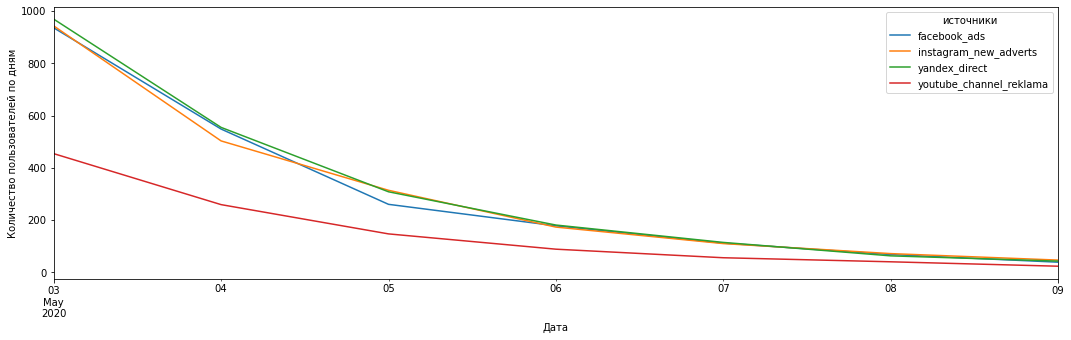

In [31]:
dau = df1.groupby(['day', 'source']).agg({'cost': 'sum'}).unstack().plot(figsize=(18,5))
plt.xlabel('Дата')
plt.ylabel('Количество пользователей по дням')
plt.legend(('facebook_ads','instagram_new_adverts','yandex_direct','youtube_channel_reklama'), title='источники')

### График для наглядности(доходы по источникам) по дням #2

In [32]:
dau

<AxesSubplot:xlabel='Дата', ylabel='Количество пользователей по дням'>

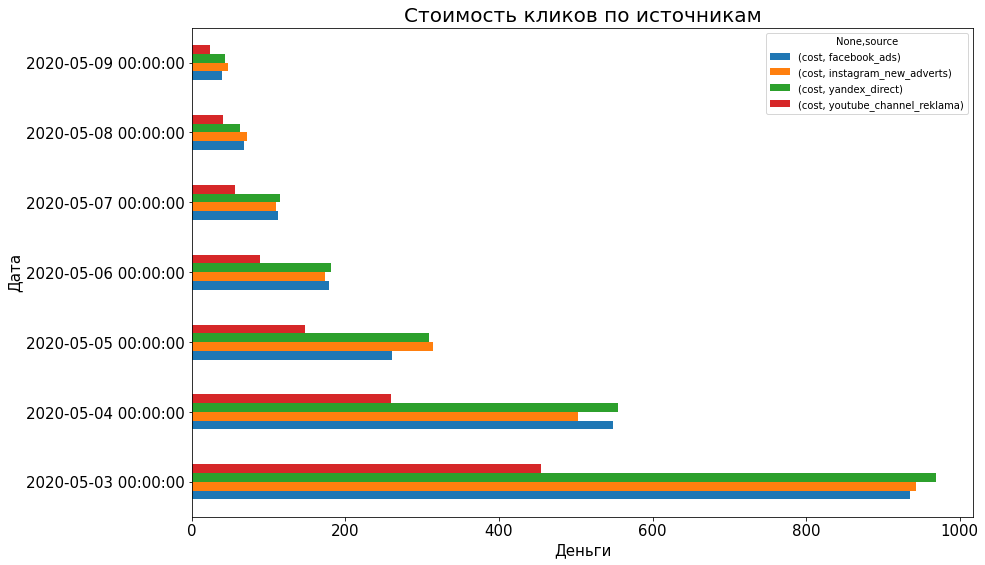

In [33]:
dau = df1.groupby(['day', 'source']).agg({'cost': 'sum'}).unstack().plot(kind="barh", figsize = (14,9),  fontsize=15)
plt.title('Стоимость кликов по источникам',fontsize=20)
plt.xlabel('Деньги', fontsize=15) 
plt.ylabel('Дата', fontsize=15) 
plt.show()

## Вывод: меньше всего денег ушло на то, чтобы привлечь пользователей с ютуба

 ### Количество уникальных пользователей по источникам

In [34]:
uni = df2.groupby(['source']).agg({'user_id': 'nunique'})

In [35]:
uni.reset_index()

,source,user_id
0,facebook_ads,2726
1,instagram_new_adverts,3347
2,yandex_direct,4817
3,youtube_channel_reklama,2686


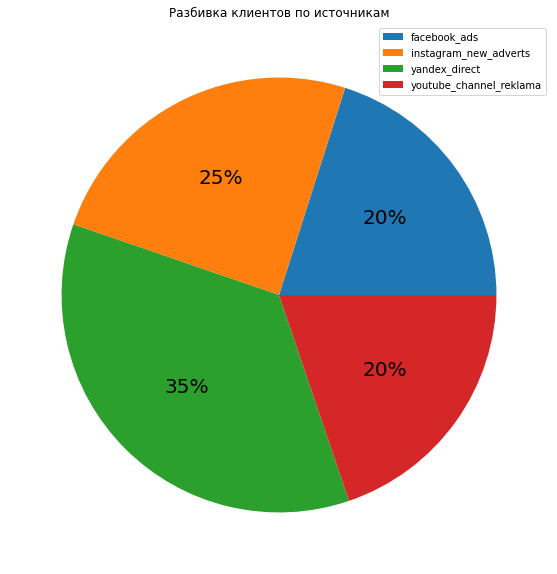

In [36]:
(uni['user_id'].plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Разбивка клиентов по источникам', fontsize=20))
plt.show()

## яндекс привёл больше всех пользователей.

In [37]:
df1.groupby('source')['cost'].sum()

source
facebook_ads              2140.905
instagram_new_adverts     2161.442
yandex_direct             2233.111
youtube_channel_reklama   1068.119
Name: cost, dtype: float64

In [38]:
df2.groupby('source')['user_id'].count()

source
facebook_ads               2726
instagram_new_adverts      3347
yandex_direct              4817
youtube_channel_reklama    2686
Name: user_id, dtype: int64

In [39]:
face=2140/2726
insta=2161/3347
ya=2233/4817
yout=1068/2686

In [40]:
face

0.7850330154071901

In [41]:
insta

0.6456528234239618

In [42]:
ya

0.46356653518787627

In [43]:
yout

0.39761727475800446

# Самый эффективный ресурс по привлечению пользователей  это ютуб

In [44]:
df['event'].unique()

array(['building', 'finished_stage_1', 'project'], dtype=object)

In [45]:
df['building_type'].unique()

array(['assembly_shop', 'spaceport', nan, 'research_center'], dtype=object)

## Далее смотрим чем занимаются пользователи

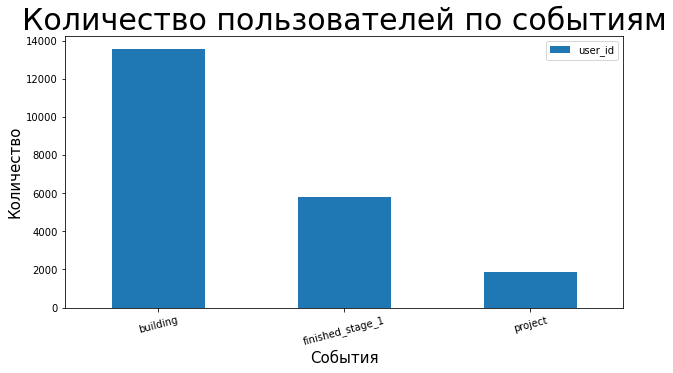

In [46]:
aa=df.groupby(['event']).agg({'user_id': 'nunique'}).plot(kind='bar', figsize=(10, 5))
sobitiye = ['building', 'finished_stage_1', 'project']
aa.set_xticklabels(sobitiye, rotation=15)
plt.title('Количество пользователей по событиям',fontsize=30)
aa.set_xlabel('События', fontsize=15)
aa.set_ylabel('Количество',fontsize=15 )
plt.show()

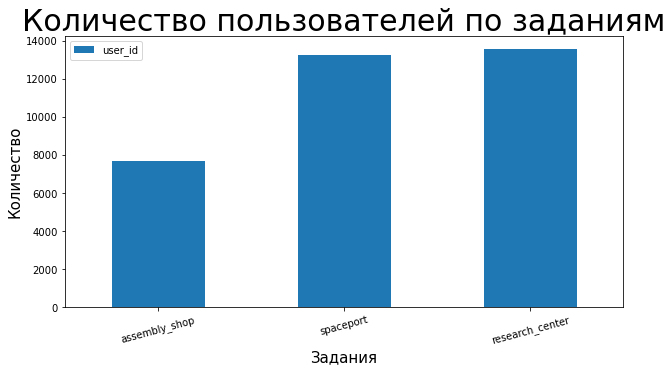

In [47]:
aa2=df.groupby(['building_type']).agg({'user_id': 'nunique'}).sort_values('user_id').plot(kind='bar', figsize=(10, 5))
sobitiye2 = ['assembly_shop', 'spaceport', 'research_center']
aa2.set_xticklabels(sobitiye2, rotation=15)
plt.title('Количество пользователей по заданиям',fontsize=30)
aa2.set_xlabel('Задания', fontsize=15)
aa2.set_ylabel('Количество',fontsize=15 )
plt.show()

# Выводы: 
## - не много тех, кто заканчивает первый уровень. строят строят и уходят. больше половины таких. 
## - строят в основном космопорты и исследовательские центры

In [48]:
firts_date = df['event_datetime'].min()
last_date = df['event_datetime'].max()

In [49]:
firts_date

Timestamp('2020-05-04 00:00:01')

In [50]:
last_date

Timestamp('2020-06-05 12:32:49')

## Ниже я создаю две базы building и project. В одной все люди кто что-то строил и потом закончил уровень(победа над другим игроком). В другой все кто так же что-то строил, окончил проект, и  окончили уровень. Потом считаю сколько времени прошло между ПЕРВЫМ(первая стройка и проект) событием и окончанием уровня.

In [51]:
SS=df.groupby(['user_id'])['event'].nunique()

In [52]:
SS=SS.reset_index()

In [53]:
SS.columns=['user_id','gruppa']

In [54]:
SS.head(15)

,user_id,gruppa
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,1
1,00151b4f-ba38-44a8-a650-d7cf130a0105,1
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,1
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2
4,002f508f-67b6-479f-814b-b05f00d4e995,1
5,003b80c6-4164-4157-bb2a-03d0181d39c4,1
6,003ee7e8-6356-4286-a715-62f22a18d2a1,2
7,004074f8-251a-4776-922c-8348dca1a2f6,2
8,00440efd-aa50-4b4b-aae8-ffcd1782729d,1
9,00464e5e-28ed-4be6-bf44-517ef7b3937b,2


### Вот они все. Объединяем с главное базой.

In [55]:
grupp=pd.merge(df, SS, on='user_id', how='outer')

In [56]:
grupp.head()

,event_datetime,event,building_type,user_id,project_type,gruppa
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,1


###  билдинг это группа людей, которые  прошли уровень победой над врагом. проект это группа тех, кто закончил проект

### описываю логику дальнейших действий:
1. ищу первую постройку, группируя по схеме пользователь - событие - минимальная дата(первая постройка)
2. реиндексирую и все дела база готова
3. есть такая штуковина как дифф, которая вычисляет разницу между временами(позднее минус ранее). в нашем случаем это окончание уровня минус первая постройка.  меньшей датой всегда будет первой постройка. 2 события 2 даты. 
4. далее получаем что-то типа этого 6 days 10:38:42. переводим всё в часы.
5. удаляем все билдинги с нанами. расходный материал.
6. часы делаем целочисленными

In [57]:
building=grupp.query('gruppa==2')

In [58]:
building = building.groupby(['user_id','event'])['event_datetime'].min()

In [59]:
building.name = 'first_event_datetime'

In [60]:
building=building.reset_index()

In [61]:
building['diff'] = building.groupby('user_id')['first_event_datetime'].diff(1)

In [62]:
building['diff'] = building['diff']/np.timedelta64(1, 'h')

In [63]:
building=building.dropna()

In [64]:
building['diff'] = building['diff'].astype('int')

In [65]:
building = building.sort_values('user_id')

In [66]:
building.head()

,user_id,event,first_event_datetime,diff
1,001d39dc-366c-4021-9604-6a3b9ff01e25,finished_stage_1,2020-05-12 07:40:47,154
3,003ee7e8-6356-4286-a715-62f22a18d2a1,finished_stage_1,2020-05-17 21:47:49,301
5,004074f8-251a-4776-922c-8348dca1a2f6,finished_stage_1,2020-05-16 19:57:40,306
7,00464e5e-28ed-4be6-bf44-517ef7b3937b,finished_stage_1,2020-05-15 16:02:01,271
9,0056c007-c082-43cc-bdef-afc49bca4cb9,finished_stage_1,2020-05-16 13:48:39,145


##  так как у проекта 3 события то чтобы дифф сработал просто выбрасываем строки с project. 

In [67]:
gruppa3=grupp.query('gruppa==3')

In [68]:
project=gruppa3.query('event!="project"')

In [69]:
project = project.groupby(['user_id','event'])['event_datetime'].min()

In [70]:
project=project.reset_index()

In [71]:
project['diff'] = project.groupby('user_id')['event_datetime'].diff(1)

In [72]:
project['diff'] = project['diff']/np.timedelta64(1, 'h')

In [73]:
project=project.dropna()

In [74]:
project['diff'] = project['diff'].astype('int')

In [75]:
project = project.sort_values('user_id')

In [76]:
project.head()

,user_id,event,event_datetime,diff
1,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,finished_stage_1,2020-05-16 11:22:33,282
3,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,finished_stage_1,2020-05-24 19:05:12,381
5,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,finished_stage_1,2020-05-27 11:38:47,481
7,00de2809-403e-4476-a2f7-ca1b11700190,finished_stage_1,2020-05-18 09:34:10,337
9,00e83261-5fd4-4939-9616-802b5a0202c6,finished_stage_1,2020-05-20 09:35:04,353


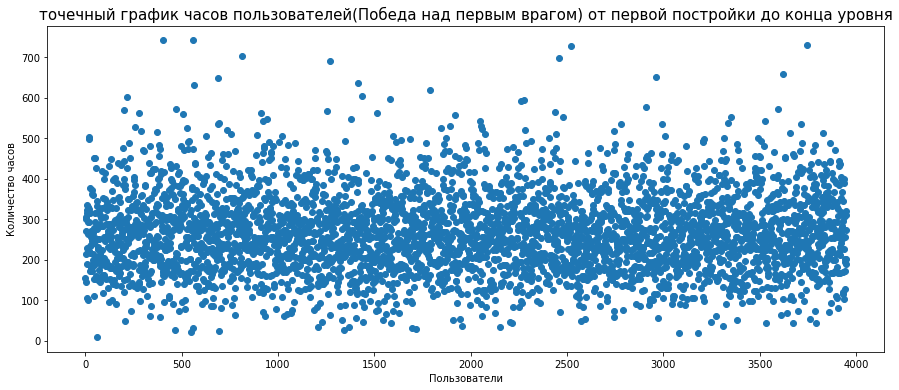

In [77]:
aaaa = pd.Series(range(0, len(building)))
plt.figure(figsize=(15,6))
plt.scatter(aaaa, building['diff'])
plt.title('точечный график часов пользователей(Победа над первым врагом) от первой постройки до конца уровня',fontsize=15)
plt.ylabel('Количество часов')
plt.xlabel('Пользователи')
plt.show()

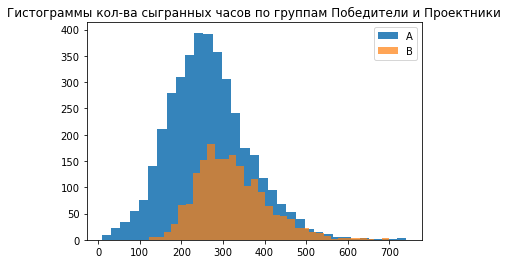

In [78]:
plt.hist(building['diff'], alpha = 0.9, label='A', bins = 33)
plt.hist(project['diff'], alpha = 0.7, label='B', bins = 33)
plt.legend()
plt.title('Гистограммы кол-ва сыгранных часов по группам Победители и Проектники')
plt.show()

# Вывод: "проектировщики" играют в основном от 200 до 400 часов. "победители" от 100 до 400 часов

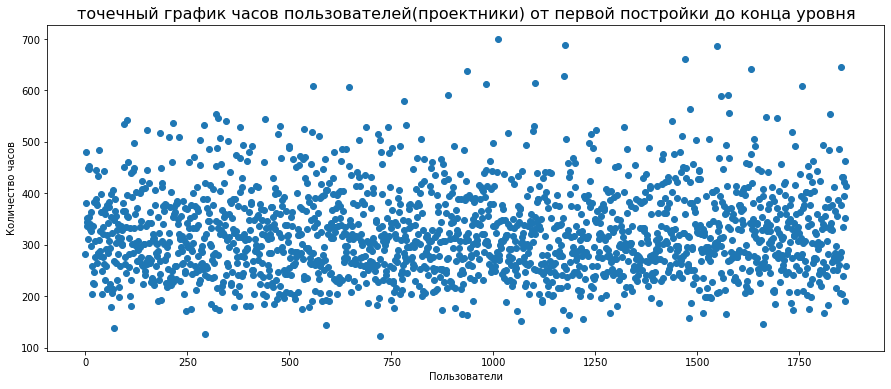

In [79]:
bbbb = pd.Series(range(0, len(project)))
plt.figure(figsize=(15,6))
plt.scatter(bbbb, project['diff'])
plt.title('точечный график часов пользователей(проектники) от первой постройки до конца уровня',fontsize=16)
plt.ylabel('Количество часов')
plt.xlabel('Пользователи')
plt.show()

# Это пользователи и время(колонка y), которое они потратили от первой постройки до конца уровня

In [80]:
project.shape

(1866, 4)

In [81]:
building.shape

(3951, 4)

In [82]:
lst = [3951, 1866]
df22 = pd.DataFrame(lst)

# Влияние событий на совершение целевого события

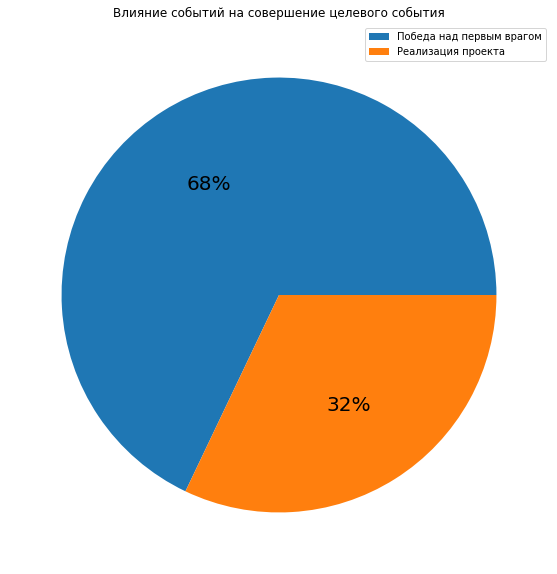

In [83]:
(df22[0].plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
        figsize=(10, 10), title='Влияние событий на совершение целевого события', fontsize=20))
labels = ['Победа над первым врагом', 'Реализация проекта']
plt.legend(labels,loc=1)
plt.show()

# Гипотеза различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.

In [84]:
A=building['diff']

In [85]:
A1=building['diff'].mean()

In [86]:
A2=building['diff'].median()

In [87]:
A1

266.0106302201974

In [88]:
A2

259.0

# Где-то 11 дней(победа над первым врагом - "победители")

In [89]:
B=project['diff']

In [90]:
B1=project['diff'].mean()

In [91]:
B2=project['diff'].median()

In [92]:
B1

322.513397642015

In [93]:
B2

312.0

# Где-то 13 дней(реализация проекта - "проектировщики")

In [94]:
alpha = 0.05
results = st.ttest_ind(A,B)
print('pvalue: {:.2F}'.format(results.pvalue))
if results.pvalue < alpha:
    print('различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком есть!!!')
else:
    print('различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком нет!!!')

pvalue: 0.00
различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком есть!!!


# Дополнительная гипотеза: Люди пришедшие с ютуба и яндекса тратят одинаковое количетсво времени на прохождение первого уровня(окончанием проекта)

In [95]:
gipoteza=pd.merge(project, df2, on='user_id', how='inner')
yandex=gipoteza.query('source=="yandex_direct"')
youtube=gipoteza.query('source=="youtube_channel_reklama"')

In [96]:
A44=yandex['diff']
b44=youtube['diff']

In [97]:
alpha = 0.05
results = st.ttest_ind(A44,b44)
print('pvalue: {:.2F}'.format(results.pvalue))
if results.pvalue < alpha:
    print('различия времени прохождения уровня(окончание проекта) пользователями пришедшие с яндекса, и пользователями пришедшие с ютуба, есть!!!')
else:
    print('различия времени прохождения уровня(окончание проекта) пользователями пришедшие с яндекса, и пользователями пришедшие с ютуба, нет!!!')

pvalue: 0.41
различия времени прохождения уровня(окончание проекта) пользователями пришедшие с яндекса, и пользователями пришедшие с ютуба, нет!!!


## Похоже от источников трафика мало что зависит. А значитможно подумать о перераспределении маркетингового бюджета

# Общий вывод: Нужно дать большую мотивацию для созидания(типа никогда по сути не достроишь, потому всегда есть что исправлять, добавлять, улучшать). формула такова - много вариантов созидания для разнообразной(разные подходы) победы над первым врагом. либо много вариантов созидания для разнообразного завершения проекта. оплату рекомендуется вводить ТОЛЬКО после завершения первого уровня.

# и да, максимально вкладываемся в ютуб!

## Дополнение: Включать монетизацию нужно, когда игрок вошёл в игру так сказать. До тех пор НИЧЕГО не должно говорить про то,что нужно что то заплатить.

## Дополнение#2 : У нас есть 2 главных параметра. Это откуда пришли и сколько "вошло в игру". Поэтому я и написал - вкладываемся в ютуб. А строить модель монетизации на тех, кто по сути не вошёл в игру глупо. Нужно строить её на процессе игры, тех кто вошёл в игру. 

## Материалы
- презентация - https://disk.yandex.ru/i/rwVgzQsQUJ8pwg
- дэшборд - https://public.tableau.com/profile/anar3519#!/vizhome/Book2_16159950929170/Dashboard1?publish=yes